## Introduction

>Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those? `relevant rubric items: “data exploration”, “outlier investigation”`

### Goal

Identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

### Why ML helps with this problem

Please think that you have become an audit team to deal with this problem. The data used for this problem contains tens of thousands of mails. How long will it take to grasp this manually?

Also, do not miss the problem, can you inject a lot of resources?

Machine learning solves these problems. Machine learning will find certain regularity from large amounts of data and identify cheaters. Also, you may discover something that people do not notice.z

### From the viewpoint of datasets

Let's think about this reason while looking at the data set.

In [1]:
# library import
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import pandas as pd
import numpy as np

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
# helper methods
#https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
         annot_kws = { 'fontsize' : 12 }
    )

In [3]:
#dataload
data = pd.read_pickle("final_project_dataset.pkl")
data_keys = data["ALLEN PHILLIP K"].keys()

In [4]:
df = pd.DataFrame(data).T
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [5]:
df.tail()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
WINOKUR JR. HERBERT S,NaN,NaN,-25000,108579,NaN,NaN,1413,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,84992,NaN
WODRASKA JOHN,NaN,NaN,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,...,NaN,189583,False,NaN,NaN,NaN,NaN,NaN,189583,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,139130
YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552,53947,NaN,NaN,NaN,...,NaN,147950,True,3576206,NaN,158403,NaN,NaN,360300,11884758
YEAP SOON,NaN,NaN,NaN,NaN,NaN,192758,55097,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,55097,192758


In [6]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

### features
- bonus: 
- deferral_payments: 
- deferred_income: 
- director_fees: 
- email_address: 
- exercised_stock_options: 
- expenses: 
- from_messages: 
- from_poi_to_this_person: 
- from_this_person_to_poi: 
- loan_advances: 
- long_term_incentive: 
- other: 
- poi: 
- restricted_stock: 
- restricted_stock_deferred: 
- salary: 
- shared_receipt_with_poi: 
- to_messages: 
- total_payments: 
- total_stock_value: 



In [7]:
df.dtypes

bonus                        object
deferral_payments            object
deferred_income              object
director_fees                object
email_address                object
exercised_stock_options      object
expenses                     object
from_messages                object
from_poi_to_this_person      object
from_this_person_to_poi      object
loan_advances                object
long_term_incentive          object
other                        object
poi                          object
restricted_stock             object
restricted_stock_deferred    object
salary                       object
shared_receipt_with_poi      object
to_messages                  object
total_payments               object
total_stock_value            object
dtype: object

In [8]:
# df = df.where(df != "NaN", pd.np.nan)
df = df.where(df != "NaN", -1)

In [9]:
df["bonus"] = df["bonus"].astype('int64')
df["deferral_payments"] = df["deferral_payments"].astype('int64')
df["deferred_income"] = df["deferred_income"].astype('int64')
df["director_fees"] = df["director_fees"].astype('int64')
# df["email_address"] = df["email_address"].astype('')
df["exercised_stock_options"] = df["exercised_stock_options"].astype('int64')
df["expenses"] = df["expenses"].astype('int64')
df["from_messages"] = df["from_messages"].astype('int64')
df["from_poi_to_this_person"] = df["from_poi_to_this_person"].astype('int64')
df["from_this_person_to_poi"] = df["from_this_person_to_poi"].astype('int64')
df["loan_advances"] = df["loan_advances"].astype('int64')
df["long_term_incentive"] = df["long_term_incentive"].astype('int64')
df["other"] = df["other"].astype('int64')
df["poi"] = df["poi"].astype('bool')
df["restricted_stock"] = df["restricted_stock"].astype('int64')
df["restricted_stock_deferred"] = df["restricted_stock_deferred"].astype('int64')
df["salary"] = df["salary"].astype('int64')
df["shared_receipt_with_poi"] = df["shared_receipt_with_poi"].astype('int64')
df["to_messages"] = df["to_messages"].astype('int64')
df["total_payments"] = df["total_payments"].astype('int64')
df["total_stock_value"] = df["total_stock_value"].astype('int64')

In [10]:
# df["other"][:10]
# df["loan_advances"][:10]
# df["long_term_incentive"][:10]

In [11]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,-1,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,-1,178980,-1,-1,-1,257817,3486,-1,-1,-1,...,-1,-1,False,-1,-1,-1,-1,-1,182466,257817
BANNANTINE JAMES M,-1,-1,-5104,-1,james.bannantine@enron.com,4046157,56301,29,39,0,...,-1,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,-1,-1,6680544,11200,-1,-1,-1,...,1586055,2660303,False,3942714,-1,267102,-1,-1,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,-1,frank.bay@enron.com,-1,129142,-1,-1,-1,...,-1,69,False,145796,-82782,239671,-1,-1,827696,63014


In [12]:
df = df.where(df != -1, pd.np.nan)

In [13]:
df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,True,False,True,True,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,False,False
BANNANTINE JAMES M,True,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,True,False,True,True,False,False
BAY FRANKLIN R,False,False,False,True,False,True,False,True,True,True,...,True,False,False,False,False,False,True,True,False,False
BAZELIDES PHILIP J,True,False,True,True,True,False,True,True,True,True,...,False,False,False,True,True,False,True,True,False,False
BECK SALLY W,False,True,True,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELFER ROBERT,True,False,True,False,True,False,True,True,True,True,...,True,True,False,True,False,True,True,True,False,False
BERBERIAN DAVID,True,True,True,True,False,False,False,True,True,True,...,True,True,False,False,True,False,True,True,False,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

## Processing missing values
In order to process missing values, first search for missing patterns

In [44]:
columns = ["bonus","deferral_payments","deferred_income","director_fees","email_address","exercised_stock_options","expenses","from_messages","from_poi_to_this_person","from_this_person_to_poi","loan_advances","long_term_incentive","other","poi","restricted_stock","restricted_stock_deferred","salary","shared_receipt_with_poi","to_messages","total_payments","total_stock_value"]

missing = df.copy()
# 欠損している場合に True とする
missing = missing.apply(pd.isnull, axis=0)
missing['count'] = 1
missing.groupby(columns).sum()

count
bonus deferral_payments deferred_income director_fees email_address exercised_stock_options expenses from_messages from_poi_to_this_person from_this_person_to_poi loan_advances long_term_incentive other poi   restricted_stock restricted_stock_deferred salary shared_receipt_with_poi to_messages total_payments total_stock_value       
False False             False           True          False         False                   False    False         False                   False                   False         False               False False False            True                      False  False                   False       False          False                  2
                                                                                                                                                                   True          False               False False False            False                     False  False                   False       False          False                  2
                                                                                                                                                                                 True                False False False            False                     False  False                   False       False          False                  1
                                                                                                                                                                                                                                  True                      False  False                   False       False          False                  2
                                                                                                     True          True                    True                    True          False               False False False            False                     False  True                    True        False          False                  1
                                                                                            True     False         False                   False                   True          False               False False False            True                      False  False                   False       False          False                  3
                                                                    True                    False    False         False                   False                   True          True                False False False            True                      False  False                   False       False          False                  1
                                                                                                     True          True                    True                    True          True                False False False            False                     False  True                    True        False          False                  1
                                                      True          False                   False    True          True                    True                    True          False               False False False            False                     False  True                    True        False          False                  1
                                                                                                                                                                                                                                  True                      False  True                    True        False          False                  1
                                                                                                                                                                                 True                False False False            True                      False  True                    True        False         

First we checked the pattern of missing values. It is found that it is randomly missing except for one.  
expect for **restricted_stock_deferred** and **loan_advances** are **True**.

In [15]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [16]:
df.describe(include=['O','bool'])

,email_address,poi
count,111,146
unique,111,2
top,danny.mccarty@enron.com,False
freq,1,128


In [17]:
# df_for_corr = df.drop(['email_address'],axis=1)

In [18]:
df.corr()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.978808,-0.980138,NaN,0.990518,0.989117,0.052725,0.562187,0.354634,0.640266,0.995012,0.961757,-0.013837,0.985062,-0.975080,0.993425,0.549102,0.372997,0.963154,0.990202
deferral_payments,0.978808,1.000000,-0.994974,1.000000,0.960891,0.973234,0.321947,0.424101,0.206993,0.356130,0.971950,0.958584,-0.084502,0.970340,-0.996176,0.977846,0.356696,0.310129,0.923344,0.963424
deferred_income,-0.980138,-0.994974,1.000000,-0.995729,-0.977234,-0.970539,-0.319995,-0.178951,-0.271673,-0.433300,-0.982358,-0.945725,0.014201,-0.971404,0.973253,-0.977737,-0.394677,-0.350815,-0.925775,-0.975203
director_fees,NaN,1.000000,-0.995729,1.000000,0.996597,0.995207,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.999011,-0.565314,NaN,1.000000,-1.000000,0.994356,0.997112
exercised_stock_options,0.990518,0.960891,-0.977234,0.996597,1.000000,0.983227,-0.066129,0.160253,-0.030101,0.665824,0.990516,0.967541,0.052886,0.991501,-0.475566,0.992739,0.154333,0.079568,0.965020,0.998869
expenses,0.989117,0.973234,-0.970539,0.995207,0.983227,1.000000,0.094144,-0.059244,0.014964,0.600193,0.988083,0.953230,-0.044508,0.982824,-0.976320,0.995945,0.223495,0.155070,0.946242,0.984372
from_messages,0.052725,0.321947,-0.319995,1.000000,-0.066129,0.094144,1.000000,0.186708,0.588687,-0.213768,-0.071958,-0.101686,-0.074308,0.003145,-0.326671,-0.003541,0.230855,0.475450,-0.033089,-0.036310
from_poi_to_this_person,0.562187,0.424101,-0.178951,NaN,0.160253,-0.059244,0.186708,1.000000,0.445063,0.009878,0.212538,0.111249,0.167722,0.133594,-0.455876,0.179055,0.659264,0.525667,0.154431,0.146366
from_this_person_to_poi,0.354634,0.206993,-0.271673,1.000000,-0.030101,0.014964,0.588687,0.445063,1.000000,0.934835,0.083591,-0.110335,0.112940,0.049284,-0.398550,0.021288,0.475748,0.568506,0.011556,0.001289
loan_advances,0.640266,0.356130,-0.433300,NaN,0.665824,0.600193,-0.213768,0.009878,0.934835,1.000000,0.553638,0.584598,0.560178,0.585069,NaN,0.600576,0.291501,0.739805,0.816098,0.667922


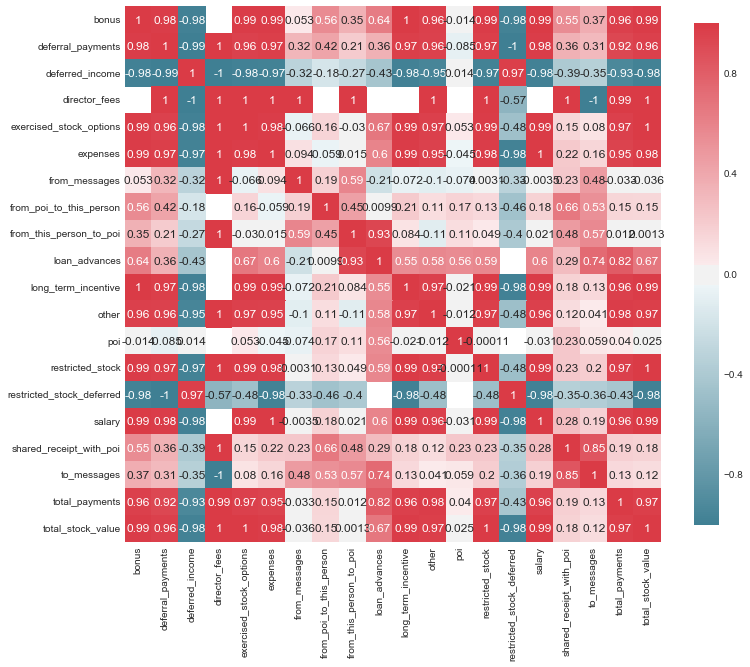

In [19]:
plot_correlation_map( df )

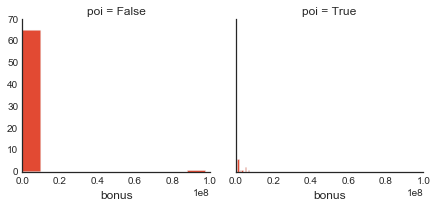

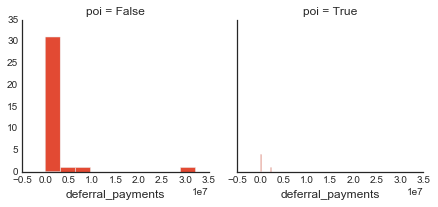

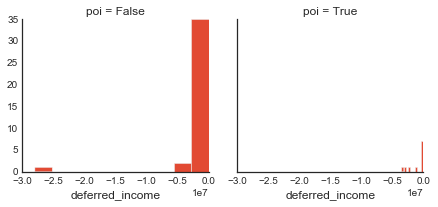

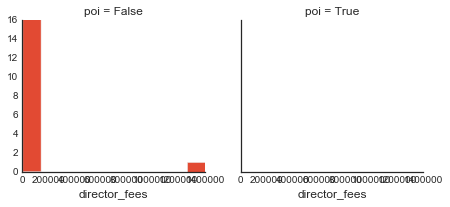

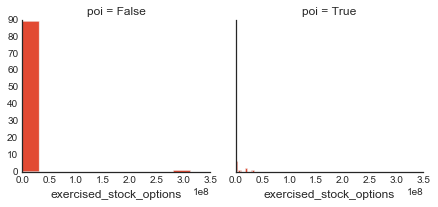

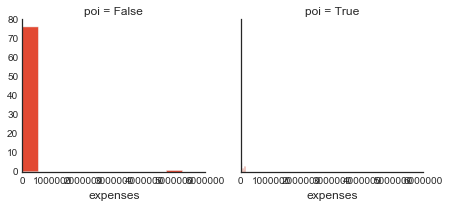

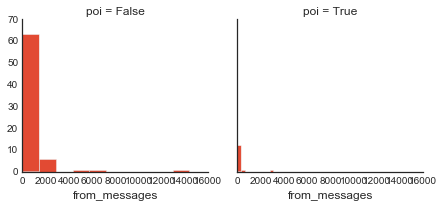

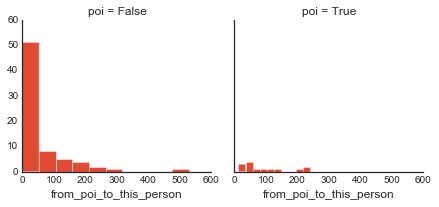

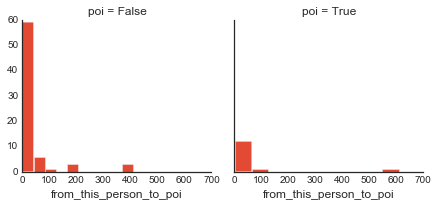

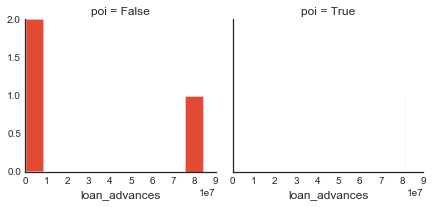

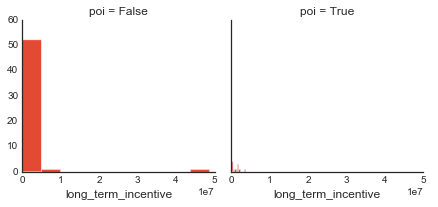

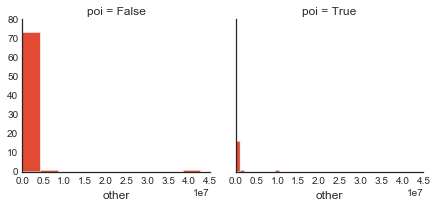

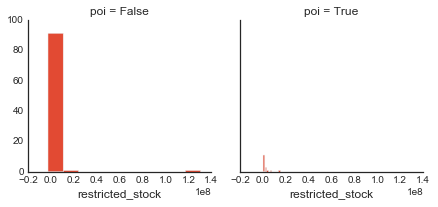

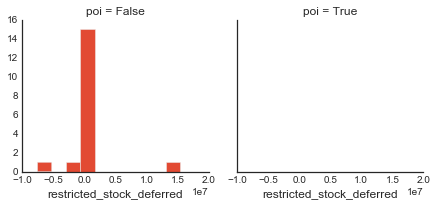

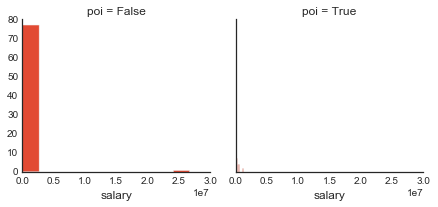

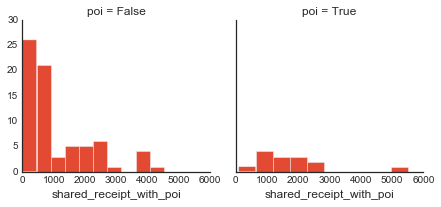

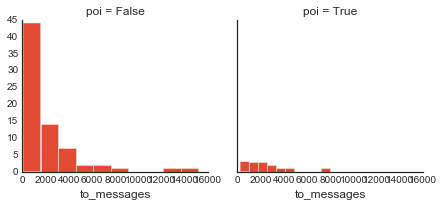

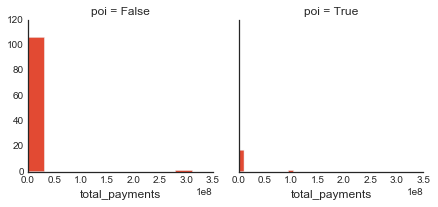

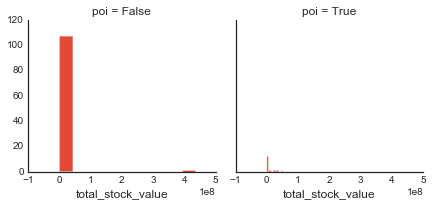

In [20]:
for col in df:
    if col not in ['poi', 'email_address']:
        grid = sns.FacetGrid(df, col='poi')
        grid.map(plt.hist, col)
        grid.add_legend();

### EDA summary

Have you enjoyed a bit of EDA?
This data set contains dozens of variables and hundreds of data.
From this we can see that it is very difficult to identify people who are POIs.
That is why we need machine learning.

## outliers

There are several ways to detect outliers, but detection was done using boxplot

In [21]:
# fig, axes = plt.subplots(4, 3, figsize=(8, 6))
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

# for i, x in enumerate(df.columns):
#     print(df[x].dtypes)
#     if df[x].dtypes not in ("object", "bool"):
#         sns.boxplot(data=df, x=x, ax=axes[i])

In [22]:
# busy
# sns.pairplot(df, hue="poi", palette="husl")

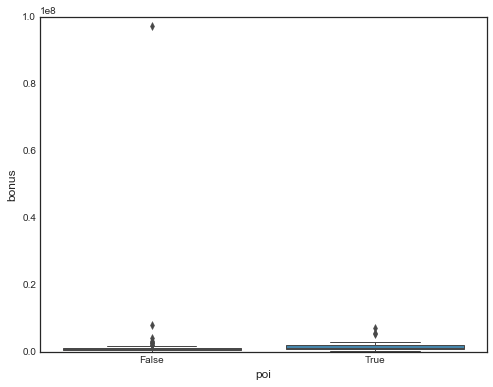

In [23]:
column_name = "bonus"
sns.boxplot(data=df, y=column_name, x="poi")

bouns value is 0.8 or more


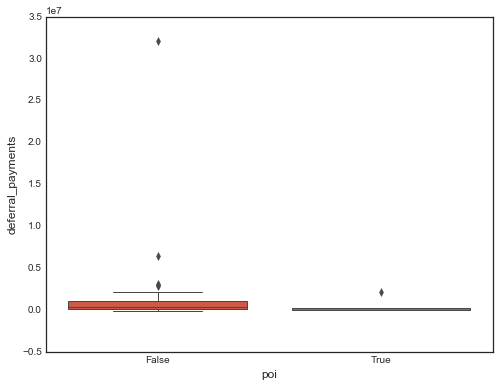

In [24]:
column_name = "deferral_payments"
sns.boxplot(data=df, y=column_name, x="poi")

deferral_payments value is 0.5 or more

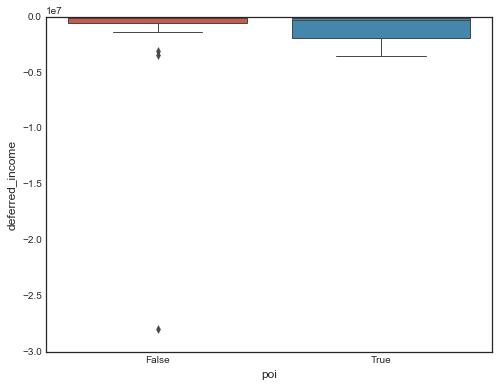

In [25]:
column_name = "deferred_income"
sns.boxplot(data=df, y=column_name, x="poi")

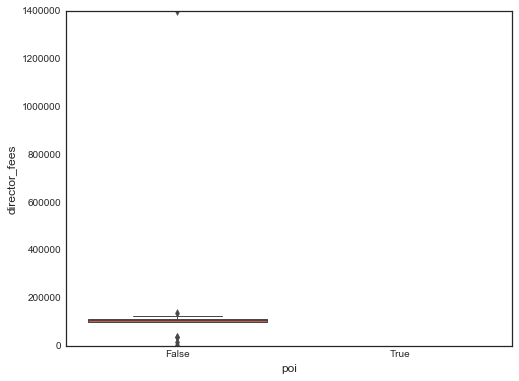

In [26]:
column_name = "director_fees"
sns.boxplot(data=df, y=column_name, x="poi")

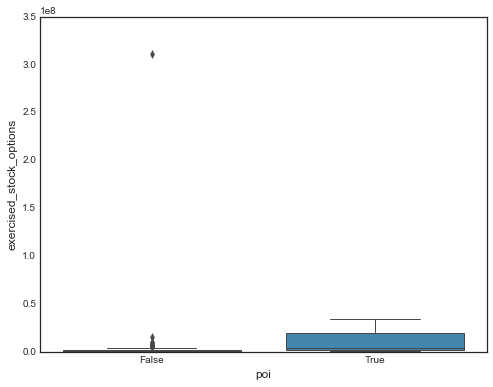

In [27]:
column_name = "exercised_stock_options"
sns.boxplot(data=df, y=column_name, x="poi")

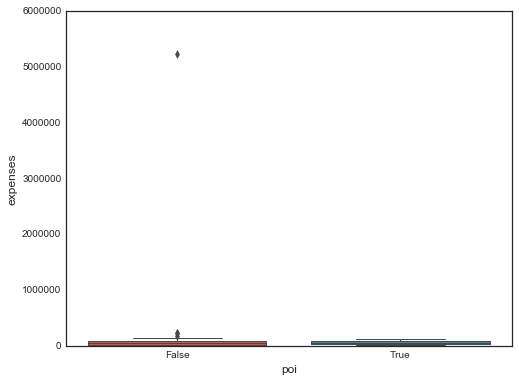

In [28]:
column_name = "expenses"
sns.boxplot(data=df, y=column_name, x="poi")

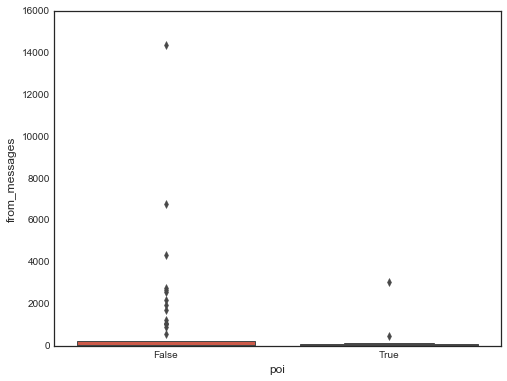

In [29]:
column_name = "from_messages"
sns.boxplot(data=df, y=column_name, x="poi")

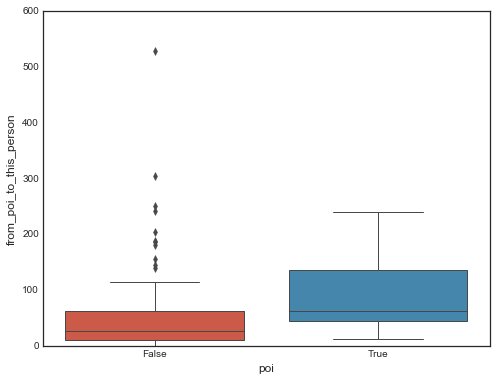

In [30]:
column_name = "from_poi_to_this_person"
sns.boxplot(data=df, y=column_name, x="poi")

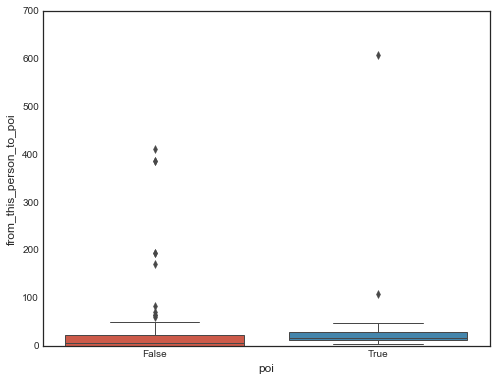

In [31]:
column_name = "from_this_person_to_poi"
sns.boxplot(data=df, y=column_name, x="poi")

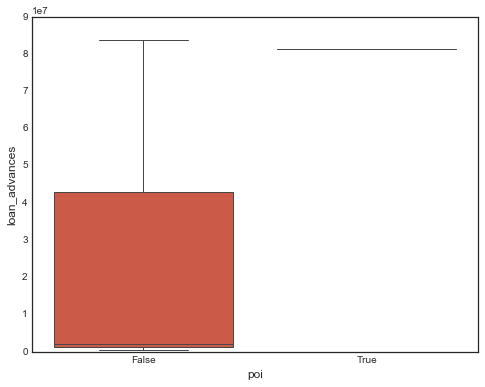

In [32]:
column_name = "loan_advances"
sns.boxplot(data=df, y=column_name, x="poi")

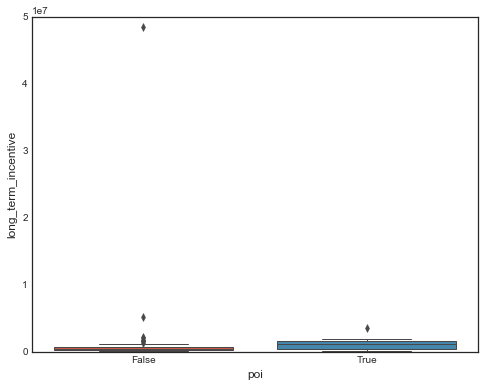

In [33]:
column_name = "long_term_incentive"
sns.boxplot(data=df, y=column_name, x="poi")

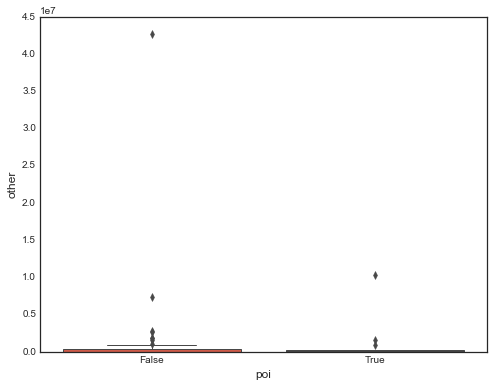

In [34]:
column_name = "other"
sns.boxplot(data=df, y=column_name, x="poi")

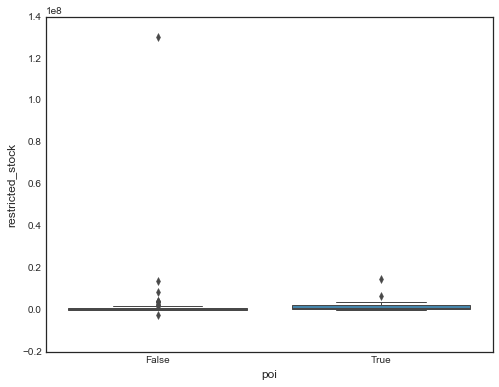

In [35]:
column_name = "restricted_stock"
sns.boxplot(data=df, y=column_name, x="poi")

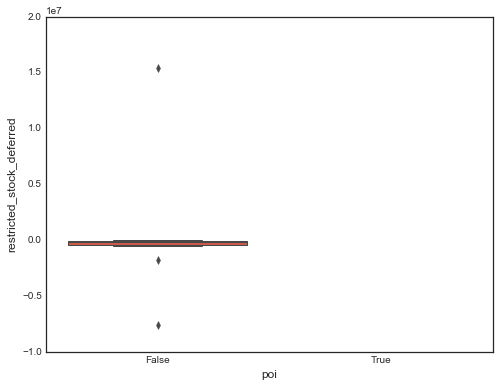

In [36]:
column_name = "restricted_stock_deferred"
sns.boxplot(data=df, y=column_name, x="poi")

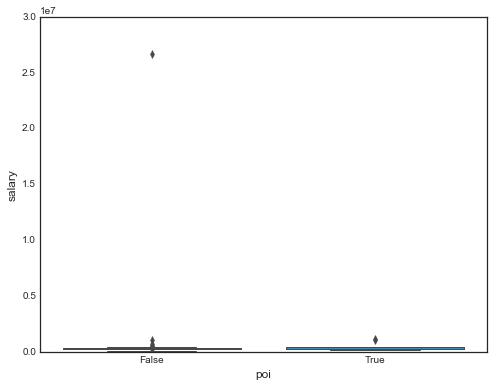

In [37]:
column_name = "salary"
sns.boxplot(data=df, y=column_name, x="poi")

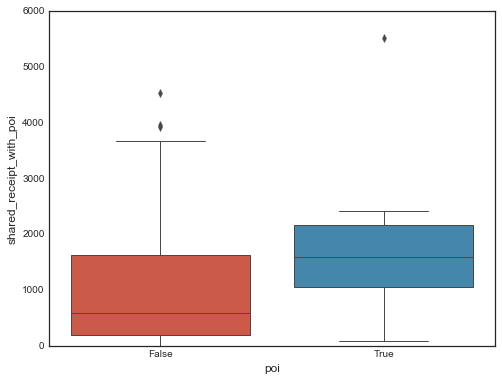

In [38]:
column_name = "shared_receipt_with_poi"
sns.boxplot(data=df, y=column_name, x="poi")

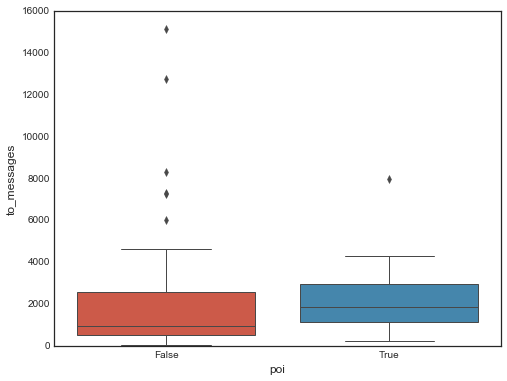

In [39]:
column_name = "to_messages"
sns.boxplot(data=df, y=column_name, x="poi")

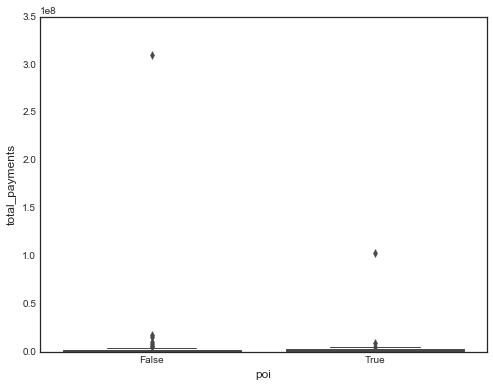

In [40]:
column_name = "total_payments"
sns.boxplot(data=df, y=column_name, x="poi")

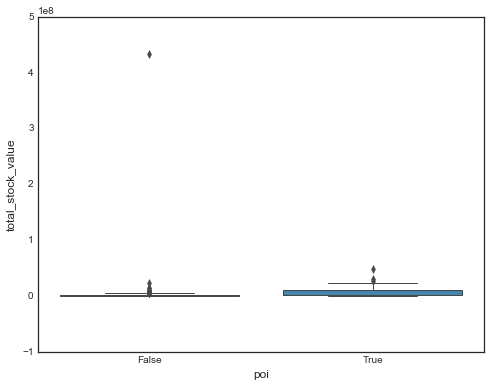

In [41]:
column_name = "total_stock_value"
sns.boxplot(data=df, y=column_name, x="poi")

## Processing outliers

- bonus value is 0.8e+8 or more
- deferral_payments value is 0.5 or more
- exercised_stock_options value is 3.0 or more
- expenses value is 5000000 or more
- from_messages values is 3500 or more
- from_poi_to_this_person  values is 300 or more
- from_this_person_to_poi values is 300 or more
- long_term_incentive values is 4 or more
- other values is 4 or more
- restricted_stock values is 1.2e+7 or more
- salary is 2.0e+7 or more
- shared_receipt_with_poi value is 40000 or more
- to_messages value is 6000 or more
- total_payments value is 0.5e+8  or more
- total_stock_value is 4e+8  or more

In [42]:
print(df.shape)
df = df[df.bonus < 0.8e+8 ]

df

(146, 21)


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0
BECK SALLY W,700000.0,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,386.0,...,NaN,566.0,False,126027.0,NaN,231330.0,2639.0,7315.0,969068.0,126027.0
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
BERGSIEKER RICHARD P,250000.0,NaN,-485813.0,NaN,rick.bergsieker@enron.com,NaN,59175.0,59.0,4.0,0.0,...,180250.0,427316.0,False,659249.0,NaN,187922.0,233.0,383.0,618850.0,659249.0
BIBI PHILIPPE A,1000000.0,NaN,NaN,NaN,philippe.bibi@enron.com,1465734.0,38559.0,40.0,23.0,8.0,...,369721.0,425688.0,False,378082.0,NaN,213625.0,1336.0,1607.0,2047593.0,1843816.0
BLACHMAN JEREMY M,850000.0,NaN,NaN,NaN,jeremy.blachman@enron.com,765313.0,84208.0,14.0,25.0,2.0,...,831809.0,272.0,False,189041.0,NaN,248546.0,2326.0,2475.0,2014835.0,954354.0
BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,15.0,...,974293.0,1621.0,True,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
BUCHANAN HAROLD G,500000.0,NaN,NaN,NaN,john.buchanan@enron.com,825464.0,600.0,125.0,0.0,0.0,...,304805.0,1215.0,False,189041.0,NaN,248017.0,23.0,1088.0,1054637.0,1014505.0
